### Importing library

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#### ACQUISITION

In [19]:
def acquire():
    df = pd.read_csv("flavors_of_cacao.csv")
    return df

#### WRANGLING

In [14]:
def wrangle(df):
    old_colnames = df.columns
    new_colnames = ['company','origin','ref','review_date','cocoa_percentage',
                'company_location','rating','bean_type','country']
    df = df.rename(columns=dict(zip(old_colnames, new_colnames)))
    df = df.drop(['company','company_location','ref', 'review_date'], axis=1)
    df = df.dropna()
    
    rating_level=['Unpleasant','Disappointing','Satisfactory','Premium','Elite']
    bins = pd.cut(df['rating'], 5, labels = rating_level)
    df['quality_bin'] = bins
    binned_data = df
    df = binned_data
    
    country_count = df.country.value_counts()
    countries_to_drop = list(country_count[(country_count < 10) | (country_count == 73)].index)
    return df


def api():
    response = requests.get('https://restcountries.eu/rest/v2/all?fields=name;subregion')
    results = response.json()
    new_data = pd.DataFrame(results)
    new_data = new_data.reindex_axis(['subregion', 'name'], axis=1)
    new_data['name']= new_data['name'].str.replace('Venezuela (Bolivarian Republic of)','Venezuela', regex=False)
    return new_data


def func(country):
    region = new_data.loc[new_data['name'] == country]
    subregion = list(region['subregion'])[0]
    return subregion   

def ser(df):
    df = df[df['country'].isin(new_data['name'])]
    return df

def subregion(df2):
    df2['subregion']=df2['country'].apply(func)
    return df2


def change_col_with_api(df):
    df = df[['subregion', 'country', 'origin', 'bean_type',
            'cocoa_percentage', 'rating', 'quality_bin']]
    return df


### ANALYSIS

In [15]:
def mean_subregion(df):
    regions_mean = df.groupby('subregion')['rating'].mean()
    regions_mean = regions_mean.sort_values(ascending=False)
    results = regions_mean
    return results

### REPORTING

In [16]:
def visualize(results):
    title = "Subregion Mean"
    fig, ax = plt.subplots(figsize=(9,8))
    barchart = sns.barplot(data=df, x='subregion', y='rating')
    plt.xticks(rotation=45)
    plt.title(title + "\n", fontsize=20)
    return barchart

def save_viz(barchart):
    title = "Subregion Mean"
    fig = barchart.get_figure()
    fig.savefig(title + '.png')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


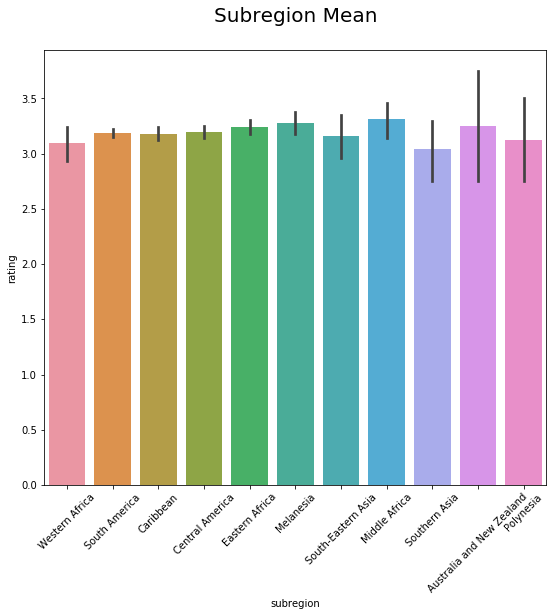

In [11]:
if __name__ == '__main__':
    df = acquire()
    df = wrangle(df)
    new_data = api()
    df = ser(df)
    df = subregion(df)
    df = change_col_with_api(df)
    results = mean_subregion(df)
    barchart = visualize(results)
    save_viz(barchart)